In [1]:
# importing the libraries
import pandas as pd
import numpy as np

In [2]:
# loading the dataset
df=pd.read_csv(r"C:\Users\himas\Downloads\Balaji Fast Food Sales.csv")
df

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
...,...,...,...,...,...,...,...,...,...,...
995,996,3/19/2023,Frankie,Fastfood,50,10,500,NaN,Mrs.,Evening
996,997,9/20/2022,Sandwich,Fastfood,60,7,420,NaN,Mr.,Evening
997,998,1/26/2023,Sandwich,Fastfood,60,13,780,NaN,Mr.,Evening
998,999,8/27/2022,Panipuri,Fastfood,20,5,100,NaN,Mrs.,Afternoon


In [3]:
df.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


In [4]:
df.tail()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
995,996,3/19/2023,Frankie,Fastfood,50,10,500,NaN,Mrs.,Evening
996,997,9/20/2022,Sandwich,Fastfood,60,7,420,NaN,Mr.,Evening
997,998,1/26/2023,Sandwich,Fastfood,60,13,780,NaN,Mr.,Evening
998,999,8/27/2022,Panipuri,Fastfood,20,5,100,NaN,Mrs.,Afternoon
999,1000,5/29/2022,Aalopuri,Fastfood,20,3,60,Online,Mrs.,Midnight


In [5]:
df.shape

(1000, 10)

- The dataset contains 1,000 rows (observations).
- The dataset contains 10 columns ( variables).

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    893 non-null    object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


**Insights**
- Only one column has missing values: transaction_type (893 non-null -> 107 missing).
- date and time_of_sale should ideally be datetime, but are currently object.
- Categorical columns are stored as object, which is expected at this stage.
- No numerical column has missing values.

In [7]:
df.columns

Index(['order_id', 'date', 'item_name', 'item_type', 'item_price', 'quantity',
       'transaction_amount', 'transaction_type', 'received_by',
       'time_of_sale'],
      dtype='object')

## Dataset Column Description

- **order_id:** Unique identifier assigned to each sales transaction.  
- **date:** The calendar date on which the sale was made.  
- **item_name:** Name of the food or beverage item purchased by the customer.  
- **item_type:** Category of the item, such as fast food or beverage.  
- **item_price:** Price of a single unit of the item sold.  
- **quantity:** Number of units of the item purchased in a transaction.  
- **transaction_amount:** Total amount paid for the transaction.  
- **transaction_type:** Mode of payment used by the customer (cash or online).  
- **received_by:** Staff member who received or handled the order.  
- **time_of_sale:** Time period during which the sale occurred (morning, evening, etc.).


In [8]:
# statistical summary of numerical columns
df.describe()

,order_id,item_price,quantity,transaction_amount
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,33.315000,8.162000,275.230000
std,288.819436,14.921744,4.413075,204.402979
min,1.000000,20.000000,1.000000,20.000000
25%,250.750000,20.000000,4.000000,120.000000
50%,500.500000,25.000000,8.000000,240.000000
75%,750.250000,50.000000,12.000000,360.000000
max,1000.000000,60.000000,15.000000,900.000000


**Insights**
- The food items are priced within a small range (20–60), showing that the menu follows fixed pricing.
- Customers usually buy more than one item per order, with most orders containing around 8 items.
- The total bill amount changes a lot from order to order because of how many items are purchased, not because items are expensive.
- Order ID is only used to identify transactions and does not provide meaningful insights for analysis.

In [9]:
df.isnull().sum()

order_id                0
date                    0
item_name               0
item_type               0
item_price              0
quantity                0
transaction_amount      0
transaction_type      107
received_by             0
time_of_sale            0
dtype: int64

- Almost all columns are complete, except **transaction_type** , which has some missing entries that need to be handled during cleaning.

In [10]:
# Understanding categories using value_counts() for all the columns.
for col in df.select_dtypes(include='object').columns:
    print(f"\n column_name : {col} ")
    print(df[col].value_counts())
    print("-" * 70)


 column_name : date 
date
8/31/2022     8
05-09-2022    8
10-11-2022    8
3/19/2023     7
02-05-2023    7
             ..
6/29/2022     1
11/21/2022    1
1/22/2023     1
3/30/2023     1
6/14/2022     1
Name: count, Length: 348, dtype: int64
----------------------------------------------------------------------

 column_name : item_name 
item_name
Cold coffee        161
Sugarcane juice    153
Panipuri           150
Frankie            139
Aalopuri           134
Vadapav            134
Sandwich           129
Name: count, dtype: int64
----------------------------------------------------------------------

 column_name : item_type 
item_type
Fastfood     686
Beverages    314
Name: count, dtype: int64
----------------------------------------------------------------------

 column_name : transaction_type 
transaction_type
Cash      476
Online    417
Name: count, dtype: int64
----------------------------------------------------------------------

 column_name : received_by 
received_by
Mr.    

### Date Column
- The date column contains multiple formats (e.g., 8/31/2022, 05-09-2022, 10-11-2022), indicating inconsistent date formatting.
- This column will need conversion to a standard datetime format during data cleaning.

### Item Name
- Cold coffee, Sugarcane juice, and Panipuri are the top-selling items, showing high customer demand.
- Sales are fairly distributed across multiple food items, with no extreme dominance by a single item.

### Item Type
- Fast food items contribute the majority of sales (686 orders) compared to beverages (314 orders).
- This indicates a higher customer preference for fast food items.

### Transaction Type
- Cash and online payments are almost evenly split, showing balanced adoption of digital payments.
- Missing values were observed earlier and will be handled during the cleaning phase.

### Received By
- Orders are almost equally handled by Mr. and Mrs., indicating balanced workload distribution.

### Time of Sale
- Sales are evenly spread across all time periods, with slightly higher activity during night and afternoon.
- No single time slot overwhelmingly dominates sales.

## Key Insights after understanding the data :

- The dataset contains **1,000 records and 10 columns**, with a mix of numerical and categorical features.
- **`transaction_type`** is the only column with **missing values**, while all other columns are complete.
- Item prices are **consistent**, and variations in transaction value are mainly driven by **quantity purchased**.
- The `date` column contains **inconsistent formats**, indicating a need for standardization.


# Data Cleaning & Manipulation

### Identify Missing Values

In [11]:
df.isnull().sum()

order_id                0
date                    0
item_name               0
item_type               0
item_price              0
quantity                0
transaction_amount      0
transaction_type      107
received_by             0
time_of_sale            0
dtype: int64

In [64]:
df["transaction_type"].value_counts()

transaction_type
cash       476
online     417
unknown    107
Name: count, dtype: int64

- The dataset contains missing values only in the `transaction_type` column (107 entries), while all other columns have complete data.

### Handling Missing Values

- The dataset contains missing values only in the `transaction_type` column.  
- Since this is a categorical variable and the number of missing values is relatively small, the missing entries are filled with a placeholder      value (`"Unknown"`) to avoid unnecessary data loss.

In [12]:
# filling null values with "unknown" .
df["transaction_type"]=df["transaction_type"].fillna("Unknown")

- Missing values in the transaction_type column were replaced with the category "Unknown" to preserve transaction records and ensure consistent categorical analysis without data loss.

In [13]:
# reverifying null values
df.isnull().sum()

order_id              0
date                  0
item_name             0
item_type             0
item_price            0
quantity              0
transaction_amount    0
transaction_type      0
received_by           0
time_of_sale          0
dtype: int64

- After handling missing values, all columns now contain zero null entries, confirming that the dataset is free of missing data.

### Check for Duplicate Records

In [14]:
df.duplicated().sum()

np.int64(0)

- No duplicate records were found in the dataset, so no rows were removed.

In [15]:
# Handling Inconsistencies in Categorical Data
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    df[col] = df[col].str.strip().str.lower()

- All categorical columns were standardized by removing extra whitespace and converting text to lowercase to ensure consistency and accurate grouping during analysis.

In [16]:
# Data type conversion
df.dtypes

order_id               int64
date                  object
item_name             object
item_type             object
item_price             int64
quantity               int64
transaction_amount     int64
transaction_type      object
received_by           object
time_of_sale          object
dtype: object

- There is only single column **date** that is in object need to be converted to **datetime** format.

In [17]:
df['date'] = pd.to_datetime(df['date'], format='mixed', errors='coerce')

- The date column was converted to datetime format using mixed-format parsing to handle inconsistencies in date representation.
- Invalid entries were coerced to NaT to ensure safe and reliable time-based analysis.
- The `errors='coerce'` parameter was used to safely handle invalid date entries by converting them to missing values instead of raising errors.

In [18]:
# checking if any null values remain
df['date'].isna().sum()

np.int64(0)

In [19]:
df["date"].dtypes

dtype('<M8[ns]')

- The `date` column is now stored in a datetime format, confirming successful and consistent conversion suitable for time-based analysis.

- Missing values and categorical inconsistencies were addressed, duplicate records were verified, and the date column was converted to a proper datetime format. The dataset is now clean, consistent, and ready for analysis.

# Univariate Analysis

#### Numerical columns Analysis

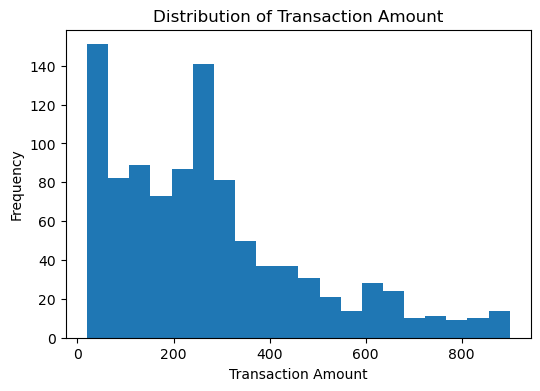

In [20]:
# Transaction Amount 
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.hist(df['transaction_amount'], bins=20)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amount')
plt.show()

**Insights**
- Most transactions are concentrated at lower amounts, showing that customers usually place small to medium-value orders.
- Higher transaction amounts occur less frequently, creating a right-skewed distribution with a few large purchases.

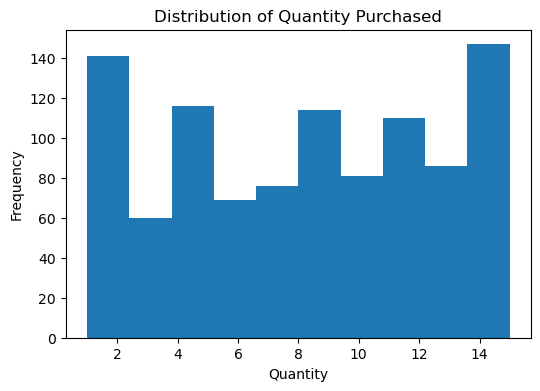

In [78]:
# Quantity (Customer Purchase Size)
plt.figure(figsize=(6,4))
plt.hist(df['quantity'],bins=10)
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Quantity Purchased')
plt.show()

**Insights**
- Customers usually purchase multiple items per order, with quantities spread across a moderate range rather than single-item purchases.
- Very large orders are less common, indicating that most transactions are small to medium-sized purchases.

#### Categorical column Analysis

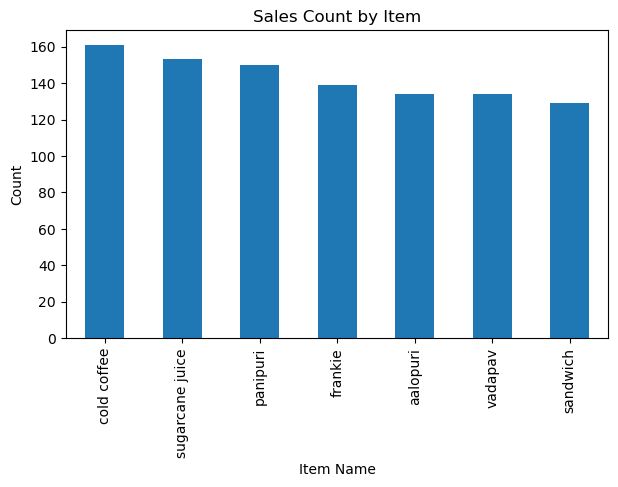

In [22]:
# Item Name (Product Demand)
df['item_name'].value_counts().plot(kind='bar', figsize=(7,4))
plt.xlabel('Item Name')
plt.ylabel('Count')
plt.title('Sales Count by Item')
plt.show()

**Insights**
- Cold coffee is the most frequently sold item, indicating strong customer preference for beverages alongside fast food.
- Sales are fairly evenly distributed across all items, suggesting that no single product completely dominates demand and the menu has balanced popularity.

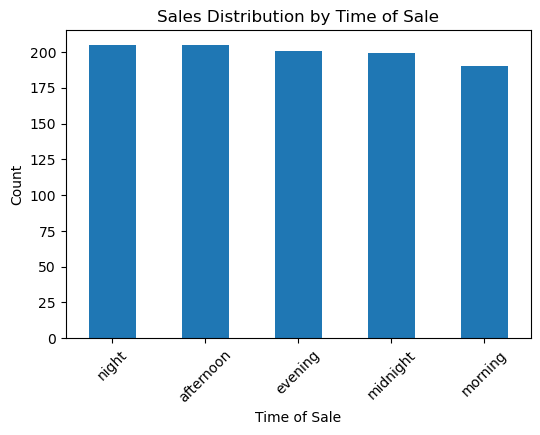

In [23]:
# Time of sale Analysis
df['time_of_sale'].value_counts().plot(kind='bar', figsize=(6,4))
plt.xlabel('Time of Sale')
plt.ylabel('Count')
plt.title('Sales Distribution by Time of Sale')
plt.xticks(rotation=45)
plt.show()

In [24]:
df['time_of_sale'].value_counts()

time_of_sale
night        205
afternoon    205
evening      201
midnight     199
morning      190
Name: count, dtype: int64

**Insights**
- Sales are fairly evenly distributed across all time periods, indicating consistent customer demand throughout the day.
- Night and afternoon show slightly higher sales, while morning has comparatively lower activity, suggesting peak customer engagement later in the day.

## Outlier Detection

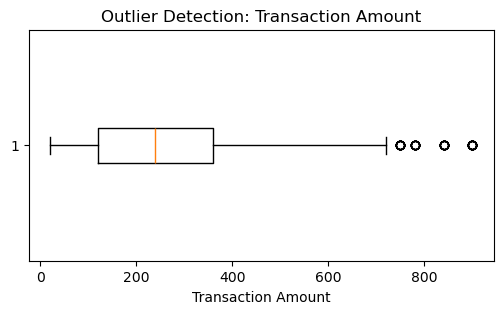

In [63]:
# Transaction Amount (Primary)
import matplotlib.pyplot as plt
plt.figure(figsize=(6,3))
plt.boxplot(df['transaction_amount'], vert=False)
plt.xlabel('Transaction Amount')
plt.title('Outlier Detection: Transaction Amount')
plt.show()

**Insights**
- A small number of high-value transaction outliers are present, indicating occasional bulk or large-quantity purchases.
- The majority of transaction amounts are concentrated within a moderate range, showing consistent spending behavior for most customers.
- These outliers appear to be valid business cases rather than data errors, so they were retained to preserve real-world transaction patterns.

# Bivariate Analysis

### 1.Numerical vs Numerical Analysis

In [25]:
# Quantity vs Transaction Amount-(non visual analysis)
df[['quantity', 'transaction_amount']].corr()

,quantity,transaction_amount
quantity,1.000000,0.731806
transaction_amount,0.731806,1.000000


**Insights after performing Bivariate non visualisation analysis**
- The correlation value (~0.73) indicates a strong positive relationship between quantity and transaction amount.
- This shows that increases in purchase quantity directly contribute to higher transaction values.

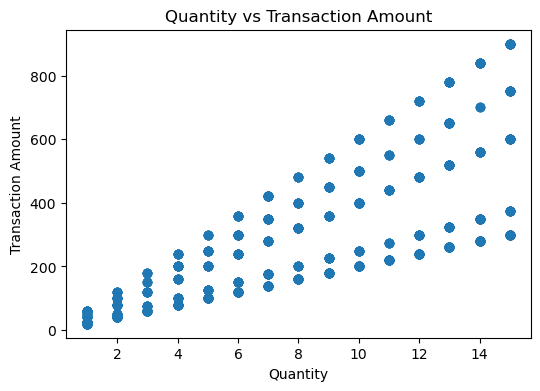

In [26]:
# Quantity vs Transaction Amount (visual Analysis)
plt.figure(figsize=(6,4))
plt.scatter(df['quantity'], df['transaction_amount'])
plt.xlabel('Quantity')
plt.ylabel('Transaction Amount')
plt.title('Quantity vs Transaction Amount')
plt.show()

**Insights after performing Bivariate visual analysis using scatterplott**
- The scatter plot shows a clear upward trend, visually confirming that transaction amount rises with quantity.
- Higher quantities are consistently associated with higher transaction amounts, reinforcing the numerical findings.

### 2.Categorical vs Numerical Analysis

In [27]:
# Item Name vs Transaction Amount – Average Spend (non visual Anlysis)
df.groupby('item_name')['transaction_amount'].mean().sort_values(ascending=False)

item_name
sandwich           510.232558
frankie            413.669065
cold coffee        338.136646
sugarcane juice    208.823529
panipuri           163.466667
aalopuri           155.820896
vadapav            150.149254
Name: transaction_amount, dtype: float64

**Insights after performing Bivariate non-visual analysis**
- Sandwich and Frankie have the highest average transaction amounts, indicating that customers usually buy these items in larger quantities per order.
- Lower-priced items like Vadapav and Aalopuri have smaller average transaction values, suggesting they are typically purchased as single or low-quantity items.

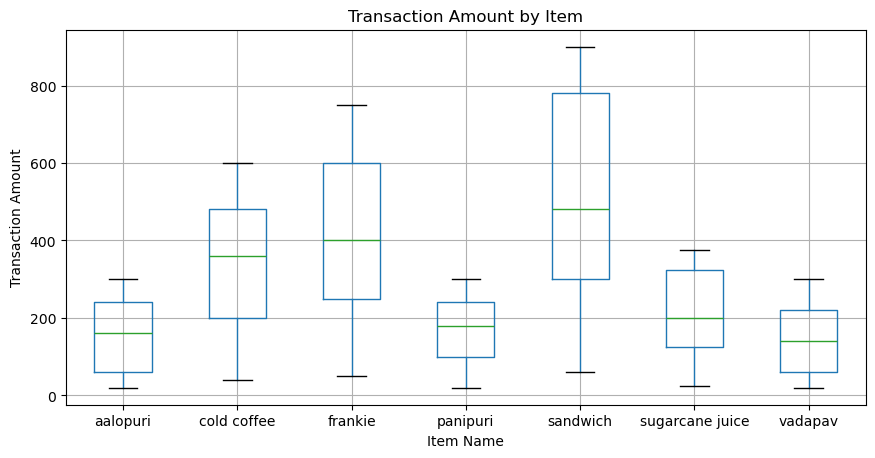

In [28]:
# Item Name vs Transaction Amount – Average Spend(visual Anlysis)
fig, ax = plt.subplots(figsize=(10,5))
df.boxplot(column='transaction_amount', by='item_name', ax=ax)
plt.xlabel('Item Name')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amount by Item')
plt.suptitle('')
plt.show()

**Insights after performing Bivariate visual analysis using boxplot**
- Sandwich has the highest median transaction amount and the widest spread, indicating customers often purchase it in larger quantities and spending varies significantly per order.

- Vadapav and Aalopuri show lower and tightly clustered transaction amounts, suggesting these items are usually bought in small quantities with consistent spending behavior.

In [29]:
# extracting year,month,date columns from date column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['month_name'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['day_name'] = df['date'].dt.day_name()

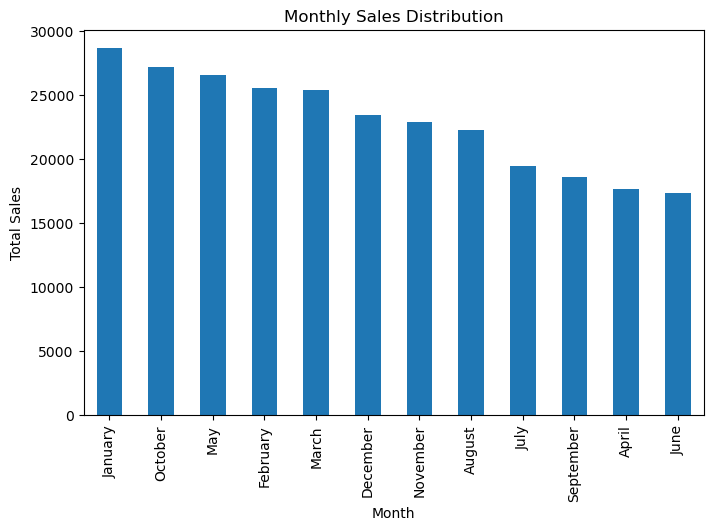

In [87]:
# Month column vs Transaction amount Analysis
monthly_sales = df.groupby('month_name')['transaction_amount'].sum()
plt.figure(figsize=(8,5))
monthly_sales.sort_values(ascending=False).plot(kind='bar')
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Distribution")
plt.show()

### Insights
- January emerges as the highest revenue-generating month, indicating strong customer demand at the start of the year.
- October and May follow closely, suggesting increased sales activity during festive or high-consumption periods.
- February, March, and December show stable mid-range performance, reflecting consistent sales across these months.
- June, April, and September record the lowest sales, highlighting potential off-season periods where promotional strategies could boost revenue.
- Overall, the descending order visualization clearly differentiates high-performing and low-performing months, supporting better inventory, staffing, and marketing decisions.

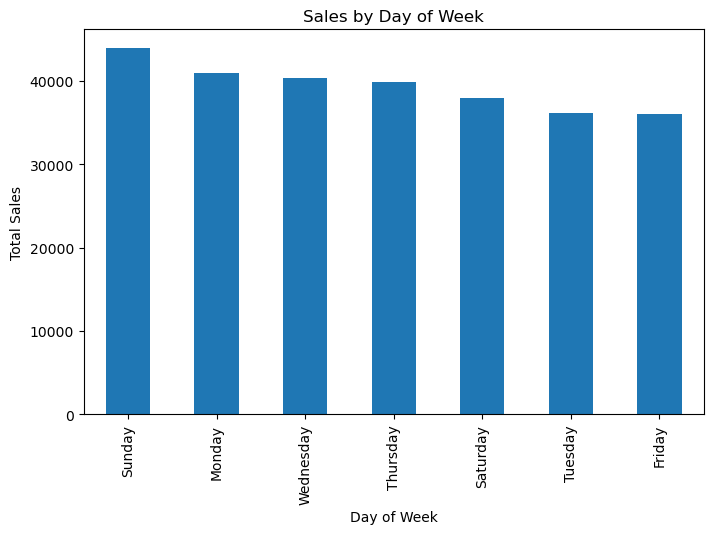

In [31]:
# sales based on weekdays
weekday_sales = df.groupby('day_name')['transaction_amount'].sum()
plt.figure(figsize=(8,5))
weekday_sales.sort_values(ascending=False).plot(kind='bar')
plt.xlabel("Day of Week")
plt.ylabel("Total Sales")
plt.title("Sales by Day of Week")
plt.show()

### Insights
- Sunday records the highest total sales, indicating peak customer activity during weekends.
- Monday and Wednesday show strong sales performance, suggesting sustained demand at the beginning and middle of the week.
- Thursday and Saturday maintain moderate sales levels, reflecting steady but not peak activity.
- Tuesday and Friday record comparatively lower sales, indicating potential low-footfall days.
- The descending order view clearly highlights weekend dominance in sales, which can guide staffing, inventory stocking, and promotional planning.

In [57]:
# Monthly Sales Analysis by Time of Sale based on sales using crosstab()
monthly_crosstab = pd.crosstab(df['month_name'],df['time_of_sale'],
                               values=df['transaction_amount'],aggfunc='sum',
                               margins=True,margins_name='Total')
monthly_crosstab

time_of_sale,afternoon,evening,midnight,morning,night,Total
month_name,,,,,,
April,4940,2830,3375,3745,2780,17670
August,5270,4095,3375,5745,3820,22305
December,4210,4645,5005,5885,3715,23460
February,6175,5230,6665,3020,4505,25595
January,5340,4525,8280,2365,8160,28670
July,3325,4840,3050,3090,5185,19490
June,3630,2640,950,4640,5475,17335
March,5515,4925,3945,4765,6240,25390
May,3400,5260,3785,7380,6745,26570


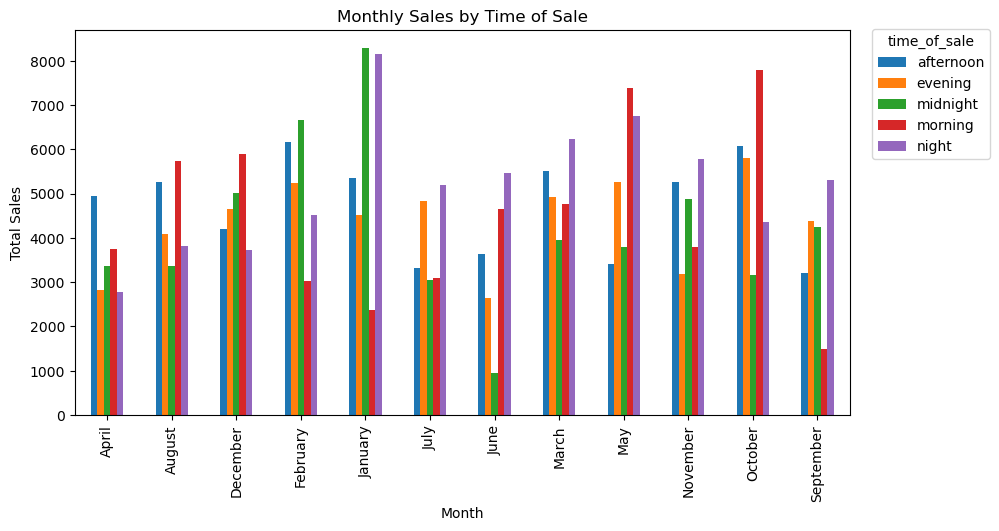

In [102]:
# Monthly Sales Analysis by Time of Sale based on sales
monthly_time = (df.groupby(['month_name', 'time_of_sale'])['transaction_amount'].sum().unstack())
monthly_time.plot(kind='bar', figsize=(10,5))
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales by Time of Sale")
# Move legend to top-right corner
plt.legend(title="time_of_sale",loc="upper left",bbox_to_anchor=(1.02, 1.02))
plt.show()

### Insights
- Evening and night periods consistently contribute high sales across most months, indicating peak customer activity during later hours of the day.
- January records the highest overall sales, with strong contributions from midnight and night sales, suggesting elevated demand at the beginning of the year.
- Morning sales peak notably in May and October, indicating increased early-day transactions during these months.
- June shows comparatively lower sales across most time slots, highlighting a potential off-season period.
- Sales distribution varies by time of day within each month, confirming that both temporal (month) and hourly factors influence overall sales performance.

### 3.Categorical vs Categorical Analysis

In [33]:
# item_type vs time_of_sale (non visual Anlysis)
pd.crosstab(df['item_type'], df['time_of_sale'],margins=True,
    margins_name='Total')

time_of_sale,afternoon,evening,midnight,morning,night,Total
item_type,,,,,,
beverages,75,62,54,57,66,314
fastfood,130,139,145,133,139,686
Total,205,201,199,190,205,1000


**Insights after performing Bivariate non-visual anlysis**
- Fast food sales are consistently higher than beverage sales across all times of the day, indicating stronger overall demand for fast food items.
- Beverage purchases are relatively more balanced throughout the day, with slightly higher activity during afternoon and night hours, suggesting steady consumption patterns.

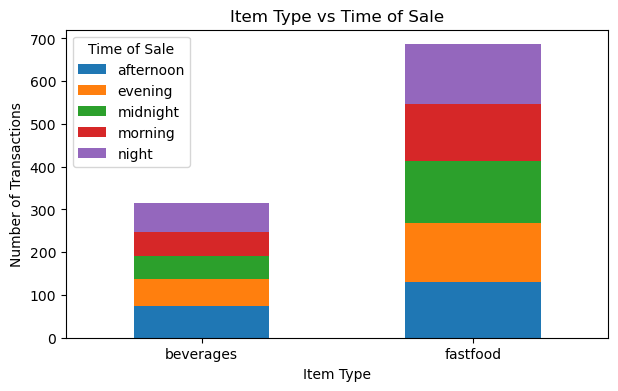

In [104]:
# item_type vs time_of_sale (visual Anlysis)
ct = pd.crosstab(df['item_type'],df['time_of_sale'])
ct.plot(kind='bar',stacked=True,figsize=(7,4))
plt.xlabel('Item Type')
plt.ylabel('Number of Transactions')
plt.title('Item Type vs Time of Sale')
plt.xticks(rotation=0)
plt.legend(title='Time of Sale')
plt.show()

**Insights after performing Bivariate visual analysis using Stacked bar chart**

- Fast food transactions are significantly higher than beverage transactions across all time periods, indicating stronger and more consistent demand for fast food items throughout the day.
- Both item types show fairly even distribution across different times of sale, suggesting customer purchasing behavior remains stable without a strong time-specific preference.

### Bivariate Analysis (Visualization): Correlation Heatmap of Numerical Variables

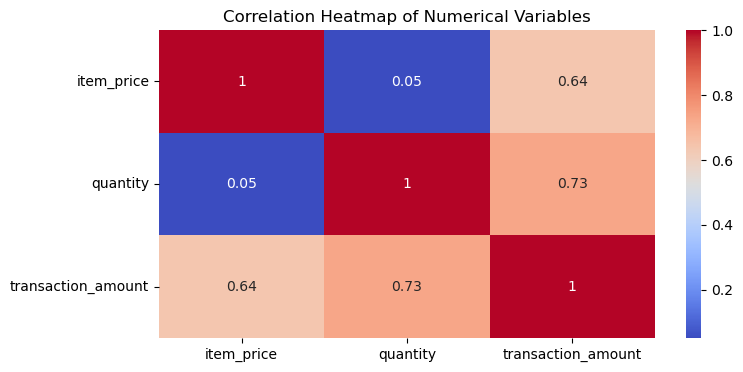

In [106]:
import seaborn as sns
num_cols = ['item_price', 'quantity', 'transaction_amount']
plt.figure(figsize=(8,4))
sns.heatmap(df[num_cols].corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Variables')
plt.yticks(rotation=0)
plt.show()

**Insights**
- Transaction amount is strongly positively correlated with quantity (0.73), indicating that higher transaction values are mainly driven by customers purchasing more items.
- Item price shows a moderate positive correlation with transaction amount (0.64), suggesting that pricing contributes to revenue but is less influential than purchase volume.
- Item price and quantity have almost no correlation (0.05), implying that the number of items purchased remains largely unaffected by price variations.
- These relationships indicate that overall sales performance is more dependent on sales volume than on individual item pricing.


## Final Summary

- The raw dataset contained minor data quality issues, including missing values in the `transaction_type` column and inconsistent date formats in the `date` field.
- No duplicate records were found, and all other columns were structurally complete.

- Missing categorical values were handled by assigning a placeholder category to preserve data integrity, while categorical text fields were standardized for consistency.
- Mixed date formats were safely converted into a uniform datetime format, ensuring reliable time-based analysis without data loss.

- Bivariate analysis revealed a strong positive relationship between purchase quantity and transaction amount, confirming that higher quantities directly drive higher transaction values. 
- Item-level analysis showed that certain products generate higher average revenue per order, and categorical comparisons indicated stable customer purchasing behavior across different times of the day.

- After addressing missing values, standardizing formats, validating data types, and verifying consistency, the dataset is clean, well-structured, and ready for further analysis or predictive modeling.
